### Descargar imágenes

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

### Cargar librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(279, 307, 3)


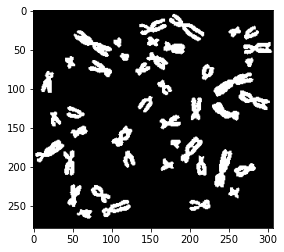

In [10]:
#Umbralizacion
im = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/Cromo.png")

imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')

### Contornos
Los contornos se pueden explicar simplemente como una curva que une todos los puntos continuos (a lo largo del límite), que tienen el mismo color o intensidad. 

Los contornos son una herramienta útil para el análisis de formas y la detección y reconocimiento de objetos.

Two border following algorithms are proposed for the topological analysis of digitized binary images. 

The first one determines the surroundness relations among the borders of a binary image. 

Since the outer borders and the hole borders have a one-to-one correspondence to the connected components of l-pixels and to the holes, respectively, the proposed algorithm yields a representation of a binary image, from which one can extract some sort of features without reconstructing the image.

The second algorithm, which is a modified version of the first, follows only the outermost borders (i.e., the outer borders which are not surrounded by holes).

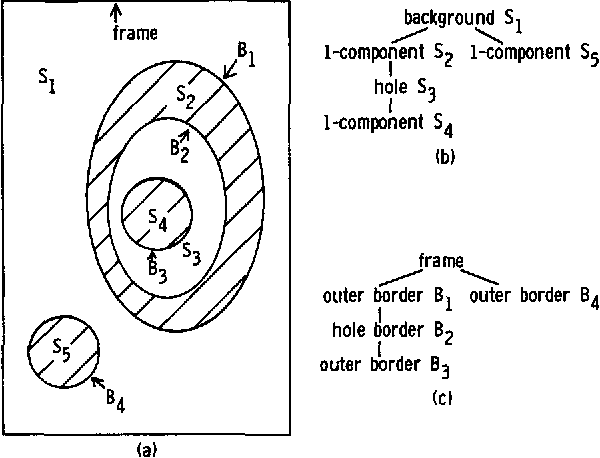

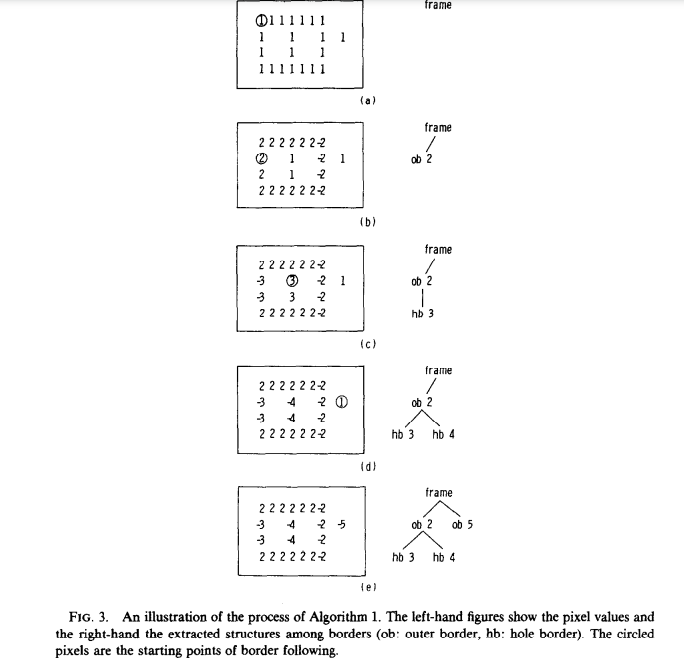

Opencv cuenta con la siguiente función para encontrar los contornos de imágenes binarias.
```
cv2.findContours(ImaB, Jerarquía, Aproximación)
        ImaB        : Imagen binaria.
        Jerarquía   : Método de clasificar los contornos por jerarquías.
                cv2.RETR_TREE: recupera todos los contornos y reconstruye una jerarquía completa de contornos anidados.
        Aproximación: Aproximación de los vectores en figuras mas sencillas. Jerarquía de arbol
                cv2.CHAIN_APPROX_SIMPLE: comprime segmentos horizontales, verticales y diagonales y deja solo sus puntos finales.
                cv2. CHAIN_APPROX_NONE : Almacena todos los puntos. 
```

La función retorna: La imagen binaria, los contornos como vectores, y las jerarquías asociadas a cada contorno, en ese respectivo orden.

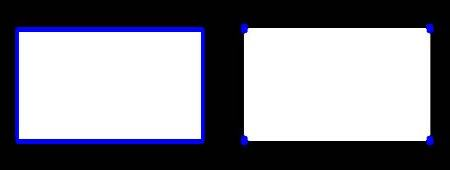

### Jerarquía
Cada contorno tiene su jerarquía dependiendo de si se encuentra al interior de un contorno o por el contrario si tiene un contorno en su interior, siendo estos considerados hijo y padre respectivamente.

En opencv, cada contorno tiene su propia información sobre qué jerarquía es, quién es su hijo, quién es su padre, etc. 

OpenCV lo representa como una matriz de cuatro valores:

$$[Next, Previous, FirstChild, Parent]$$

Donde los valores indican: el contorno siguiente, el contorno anterior (en el mismo nivel jeraquico), el primer contorno secundario y el indice del contorno principal.

Para mas información ver el siguiente enlace.

https://docs.opencv.org/trunk/d9/d8b/tutorial_py_contours_hierarchy.html

https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html

In [5]:
#Encontrar contornos
# thresh = Imagen binarizada por el algoritmo de OTSU
print(thresh[0].dtype)
contornos, jerarquia = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print (np.shape(contornos))
print (np.shape(jerarquia))

uint8
(77,)
(1, 77, 4)


In [17]:
contornos[1][:5] # Primeros 5 puntos del primer contorno

array([[[115, 243]],

       [[114, 244]],

       [[113, 244]],

       [[111, 246]],

       [[110, 246]]], dtype=int32)

$$[Next, Previous, FirstChild, Parent]$$

In [14]:
print (jerarquia[0,0,:]) # Muestra los 4 elementos de los primeros 3 contornos
print (jerarquia[0,1,:])
print (jerarquia[0,2,:])

[ 1 -1 -1 -1]
[ 6  0  2 -1]
[ 3 -1 -1  1]


### Dibujar contornos
Para dibujar los contornos, se utiliza la función cv2.drawContours. 

También se puede usar para dibujar cualquier forma siempre que tenga sus puntos de límite. 

Su primer argumento es la imagen de origen, el segundo argumento son los contornos que deben pasarse como una lista de Python, el tercer argumento es el índice de contornos (útil al dibujar contornos individuales. Para dibujar todos los contornos se debe poner -1) y los argumentos restantes son color, grosor etc.

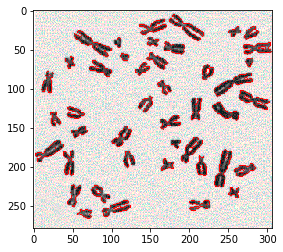

In [31]:
#Dibujar los contornos
img=im.copy()
# cv2.drawContours(imagen, arreglo_contornos, contorno_interes, (RGB), grosor del contorno)
# contorno_interes = -1 : Todos
img = cv2.drawContours(img, contornos, -1, (255,0,0), 1) 
plt.imshow(img)

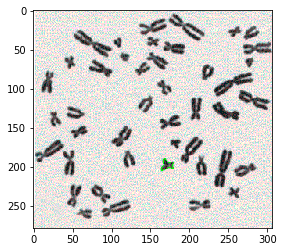

In [32]:
#Dibujar el quinceavo contorno
img=im.copy()
img = cv2.drawContours(img, contornos, 15, (0,255,0), 1)
plt.imshow(img)

Veamos como se lee la matriz de jerarquia empezando con el primer contorno

[ 1 -1 -1 -1]


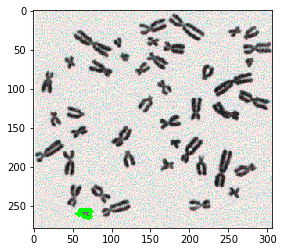

In [34]:
print (jerarquia[0,0,:])
#Dibujar el quinceavo contorno
img=im.copy()
img = cv2.drawContours(img, contornos, 0, (0,255,0), 4)
plt.imshow(img)

[ 6  0  2 -1]


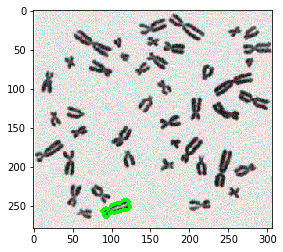

In [35]:
print (jerarquia[0,1,:])
#Dibujar el quinceavo contorno
img=im.copy()
img = cv2.drawContours(img, contornos, 1, (0,255,0), 4)
plt.imshow(img)

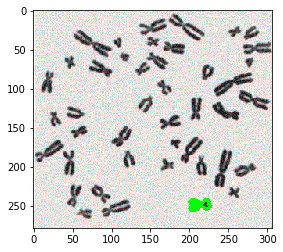

In [37]:
#Dibujar el quinceavo contorno
img = cv2.drawContours(img, contornos, 6, (0,255,0), 4)
plt.imshow(img)

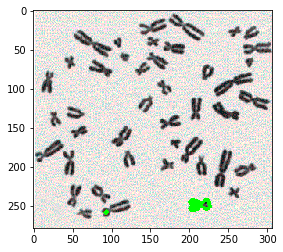

In [38]:
#Dibujar el quinceavo contorno
img = cv2.drawContours(img, contornos, 2, (0,255,0), 4)
plt.imshow(img)

[[[167 190]]

 [[166 191]]

 [[166 196]]

 [[168 198]]

 [[167 199]]]


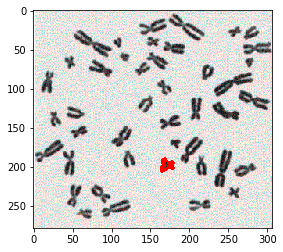

In [40]:
#sacar el cuarto contorno
cnt = contornos[15]
print(cnt[:5])
img=im.copy()
img = cv2.drawContours(img, [cnt], 0, (255,0,0), 3)
plt.imshow(img)

## Comparación con el Algoritmo de Canny
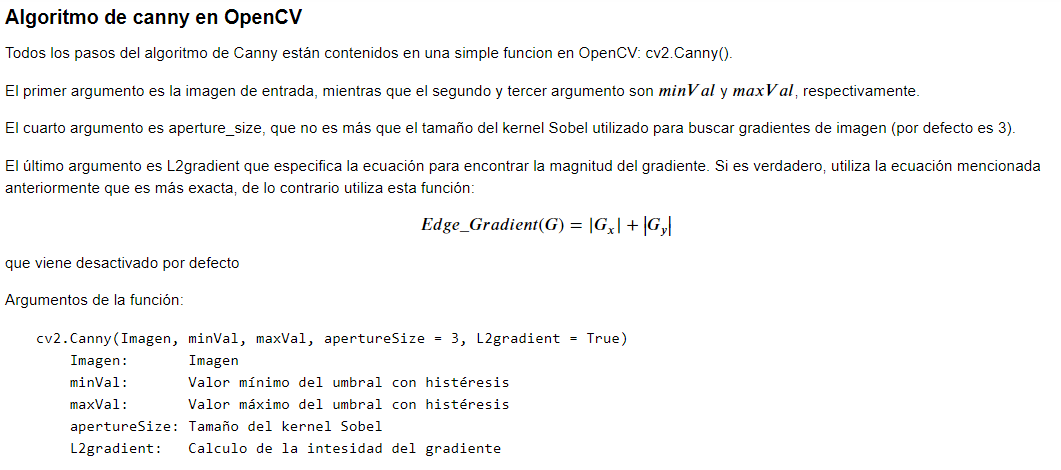

(-0.5, 306.5, 278.5, -0.5)

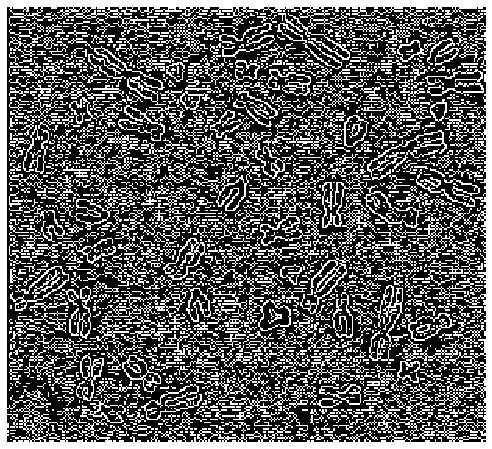

In [45]:
bordes = cv2.Canny(img, 150, 180, apertureSize = 3, L2gradient = True)

plt.figure(figsize=(20,8))
plt.imshow(bordes, cmap='gray')
plt.axis('off')

# A Tener en cuenta:
- im = Imagen original
- imgray = Imagen en escala de Grises
- thresh = Imagen Binarizada


# Filtro de Canny con Prefiltrado de la imagen binarizada

(-0.5, 306.5, 278.5, -0.5)

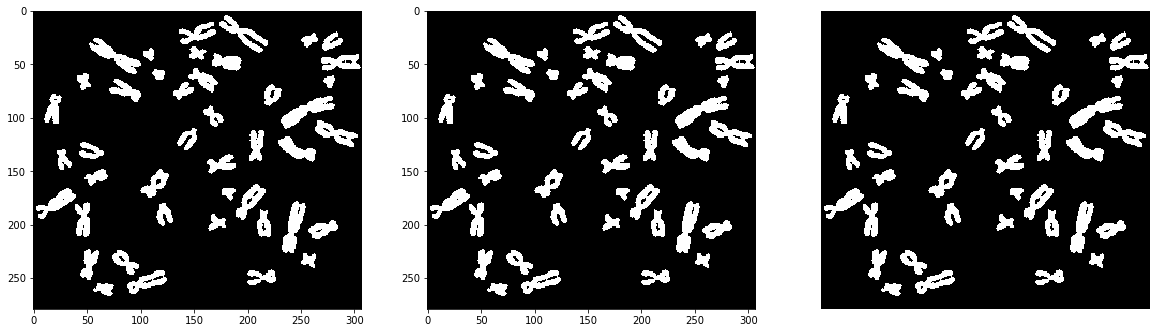

In [77]:
img_blur_filter = cv2.blur(thresh, (1,1), cv2.BORDER_DEFAULT)
img_medianBlur_filter = cv2.medianBlur(thresh, 1)
img_gaussianBlur_filter = cv2.GaussianBlur(thresh,(1,1),cv2.BORDER_DEFAULT)

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(img_blur_filter, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_medianBlur_filter, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_gaussianBlur_filter, cmap='gray')
plt.axis('off')

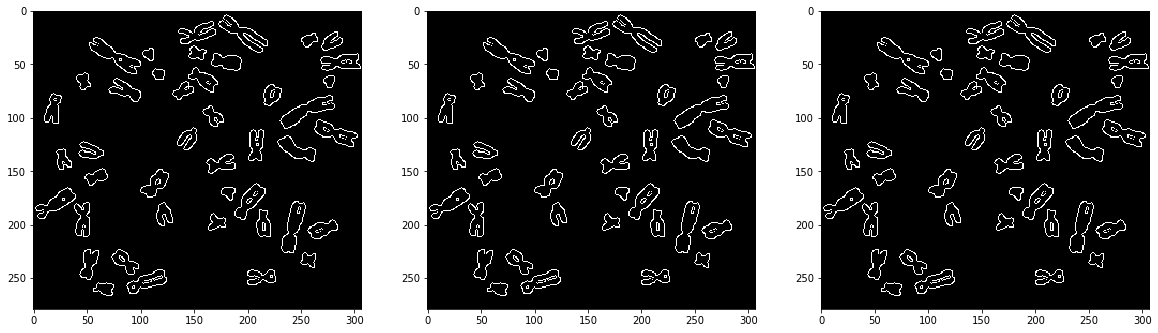

In [151]:
bordes_blur = cv2.Canny(img_blur_filter, 0, 1, apertureSize = 3, L2gradient = True)
bordes_median = cv2.Canny(img_medianBlur_filter, 0, 1, apertureSize = 3, L2gradient = True)
bordes_gaussian = cv2.Canny(img_gaussianBlur_filter, 0, 1, apertureSize = 3, L2gradient = True)

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(bordes_blur, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(bordes_median, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(bordes_gaussian, cmap='gray')

# Filtro de Canny con Transformada de Fourier de la imagen

(-0.5, 306.5, 278.5, -0.5)

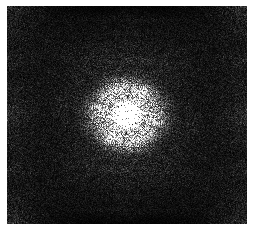

In [108]:
#transformada de Fourier
f = np.fft.fft2(imgray)
#Centrar las frecuencias en el centro de la imagen
fshift = np.fft.fftshift(f)
#Mostrar la imagen
plt.imshow(np.abs(fshift), cmap = 'gray', vmin=np.min(np.abs(fshift)), vmax=np.max(np.abs(fshift))/500)
plt.axis('off')

121 157 135 171


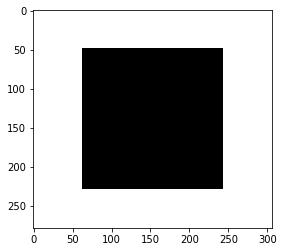

In [168]:
#Crear filtro
rows, cols = imgray.shape
fil=np.ones((rows,cols)) # Matriz Inicial llena de unos
ven=18                   # Seleccion de tamaño del espectro de interés / Radio de las Frecuencias de interes
crow,ccol = int(rows/2) , int(cols/2)
A = 5
fil[crow-A*ven:crow+A*ven, ccol-A*ven:ccol+A*ven] = 0
print(crow-ven, crow+ven, ccol-ven, ccol+ven)
plt.imshow(fil, cmap = 'gray') # 0 = Negro / 255 = Blanco

In [169]:
#filtro pasa altas (Con ceros en el centro)
fshift1=fshift*fil
#filtro pasa bajas (Con ceros hacia los bordes)
fshift2=fshift*(1-fil) 

In [170]:
#Deshacer el centrado de las frecuencias
f_ishift1 = np.fft.ifftshift(fshift1)
#Transformada rápida de fourier inversa
img_back1 = np.fft.ifft2(f_ishift1)
img_back1 = np.abs(img_back1)

#Deshacer el centrado de las frecuencias
f_ishift2 = np.fft.ifftshift(fshift2)
#Transformada rápida de fourier inversa
img_back2 = np.fft.ifft2(f_ishift2)
img_back2 = np.abs(img_back2)

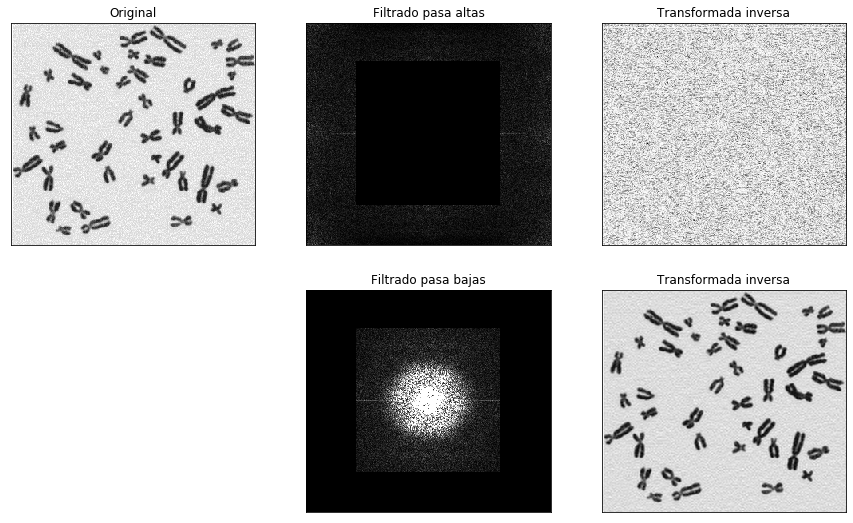

In [187]:
plt.figure(figsize=(15,9))
plt.subplot(231),plt.imshow(imgray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(np.abs(fshift1), cmap = 'gray', vmin=np.min(np.abs(fshift)), vmax=np.max(np.abs(fshift))/500)
plt.title('Filtrado pasa altas'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(1-img_back1,cmap = 'gray')
plt.title('Transformada inversa'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(np.abs(fshift2),cmap = 'gray', vmin=np.min(np.abs(fshift)), vmax=np.max(np.abs(fshift))/500)
plt.title('Filtrado pasa bajas'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(img_back2,cmap = 'gray')
plt.title('Transformada inversa'), plt.xticks([]), plt.yticks([])
plt.show()

In [202]:
# Binarizacion de la imagen filtrada por el pasa bajas
ret, thresh_2 = cv2.threshold(np.uint8(img_back2),0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 

Text(0.5, 1.0, 'imagen filtrada por pasabajas binarizarada')

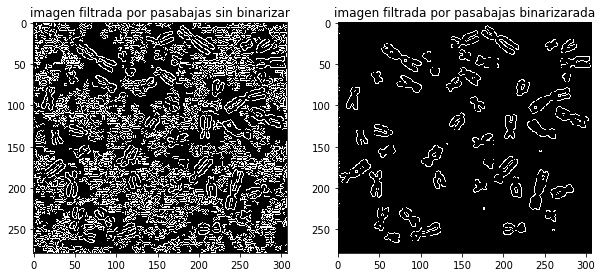

In [208]:
# Filtro de cani aplicado
imgray_pasa_bajas = cv2.Canny(np.uint8(img_back2), 0, 100, apertureSize = 3, L2gradient = True)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(imgray_pasa_bajas, cmap='gray')
plt.title("imagen filtrada por pasabajas sin binarizar")

imgray_pasa_bajas = cv2.Canny(np.uint8(thresh_2), 0, 100, apertureSize = 3, L2gradient = True)
plt.subplot(1,2,2)
plt.imshow(imgray_pasa_bajas, cmap='gray')
plt.title("imagen filtrada por pasabajas binarizarada")
